<a href="https://colab.research.google.com/github/swaroop-raj/machine-learning/blob/main/machine-learning/notebooks/PE_Linear_Regression_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Exercise Linear Regression
Welcome to the practice exercise on Linear Regression. We strongly recommend you try out all the questions/steps mentioned here and refer to the solution notebook later.

## Case Study: Boston Housing Price Prediction

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM:     per capita crime rate by town
- ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS:    proportion of non-retail business acres per town
- CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX:      nitric oxides concentration (parts per 10 million)
- RM:       average number of rooms per dwelling
- AGE:      proportion of owner-occupied units built prior to 1940
- DIS:      weighted distances to five Boston employment centres
- RAD:      index of accessibility to radial highways
- TAX:      full-value property-tax rate per 10,000 dollars
- PTRATIO:  pupil-teacher ratio by town
- LSTAT:    %lower status of the population
- MEDV:     Median value of owner-occupied homes in 1000 dollars.


**Importing Libraries**

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

### <a id = "link1">Load the dataset</a>

In [5]:
cdata = pd.read_csv("/content/boston.csv")
cdata.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Exploratory Data Analysis

In [6]:
cdata.shape

(506, 14)

**Get the info data types column wise**

In [7]:
cdata.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Get summary statistics around the numerical columns**

In [8]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
cdata.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NX          81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [10]:
cdata.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
def check_zero(data):
  for col in cdata.columns:
    print("number of zeros in " + col + " " + str(cdata[cdata[col] ==0 ].shape[0]))
    

In [12]:
check_zero(cdata)

number of zeros in CRIM 0
number of zeros in ZN 372
number of zeros in INDUS 0
number of zeros in CHAS 471
number of zeros in NX 0
number of zeros in RM 0
number of zeros in AGE 0
number of zeros in DIS 0
number of zeros in RAD 0
number of zeros in TAX 0
number of zeros in PTRATIO 0
number of zeros in B 0
number of zeros in LSTAT 0
number of zeros in MEDV 0


### Univariate and Bivariate Analysis
Plot the distplots for the features and then plot scatterplots for features and the target variable 

To do - Identify insights if any from the distributuions.

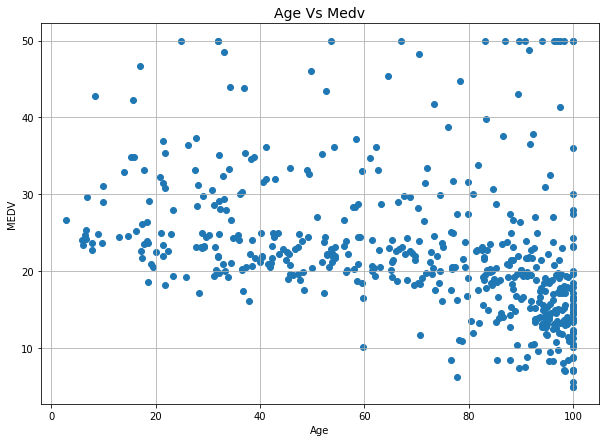

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(cdata['AGE'] , cdata['MEDV'] )
plt.title('Age Vs Medv' , fontsize = 14)
plt.xlabel('Age')
plt.ylabel('MEDV')
plt.grid(True)
plt.show()

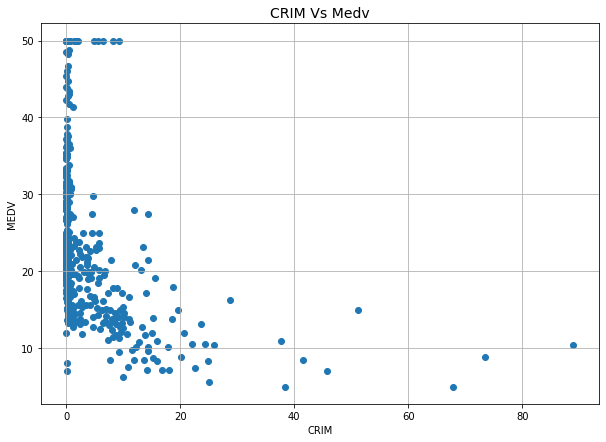

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(cdata['CRIM'] , cdata['MEDV'] )
plt.title('CRIM Vs Medv' , fontsize = 14)
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.grid(True)
plt.show()

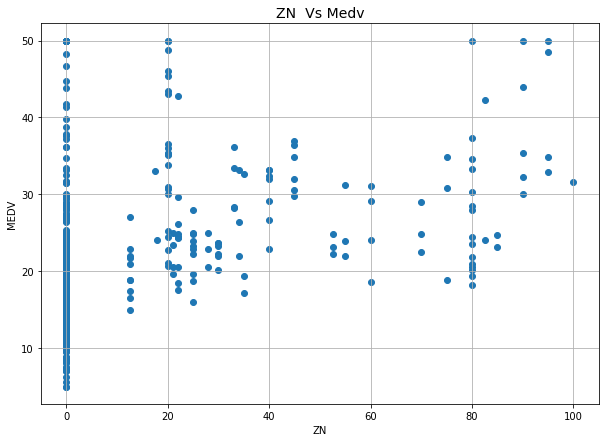

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(cdata['ZN'] , cdata['MEDV'] )
plt.title('ZN  Vs Medv' , fontsize = 14)
plt.xlabel('ZN')
plt.ylabel('MEDV')
plt.grid(True)
plt.show()

**Get the Correlation Heatmap**

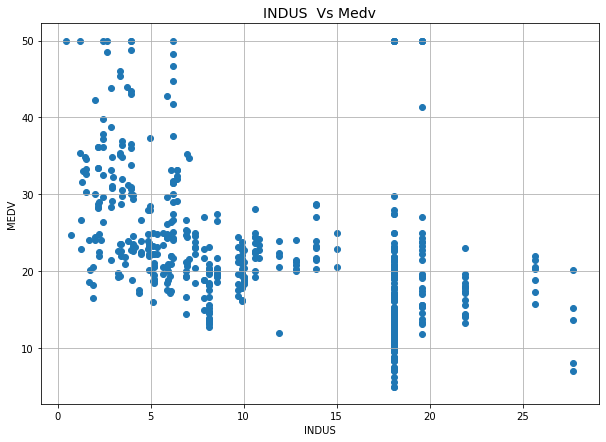

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(cdata['INDUS'] , cdata['MEDV'] )
plt.title('INDUS  Vs Medv' , fontsize = 14)
plt.xlabel('INDUS')
plt.ylabel('MEDV')
plt.grid(True)
plt.show()

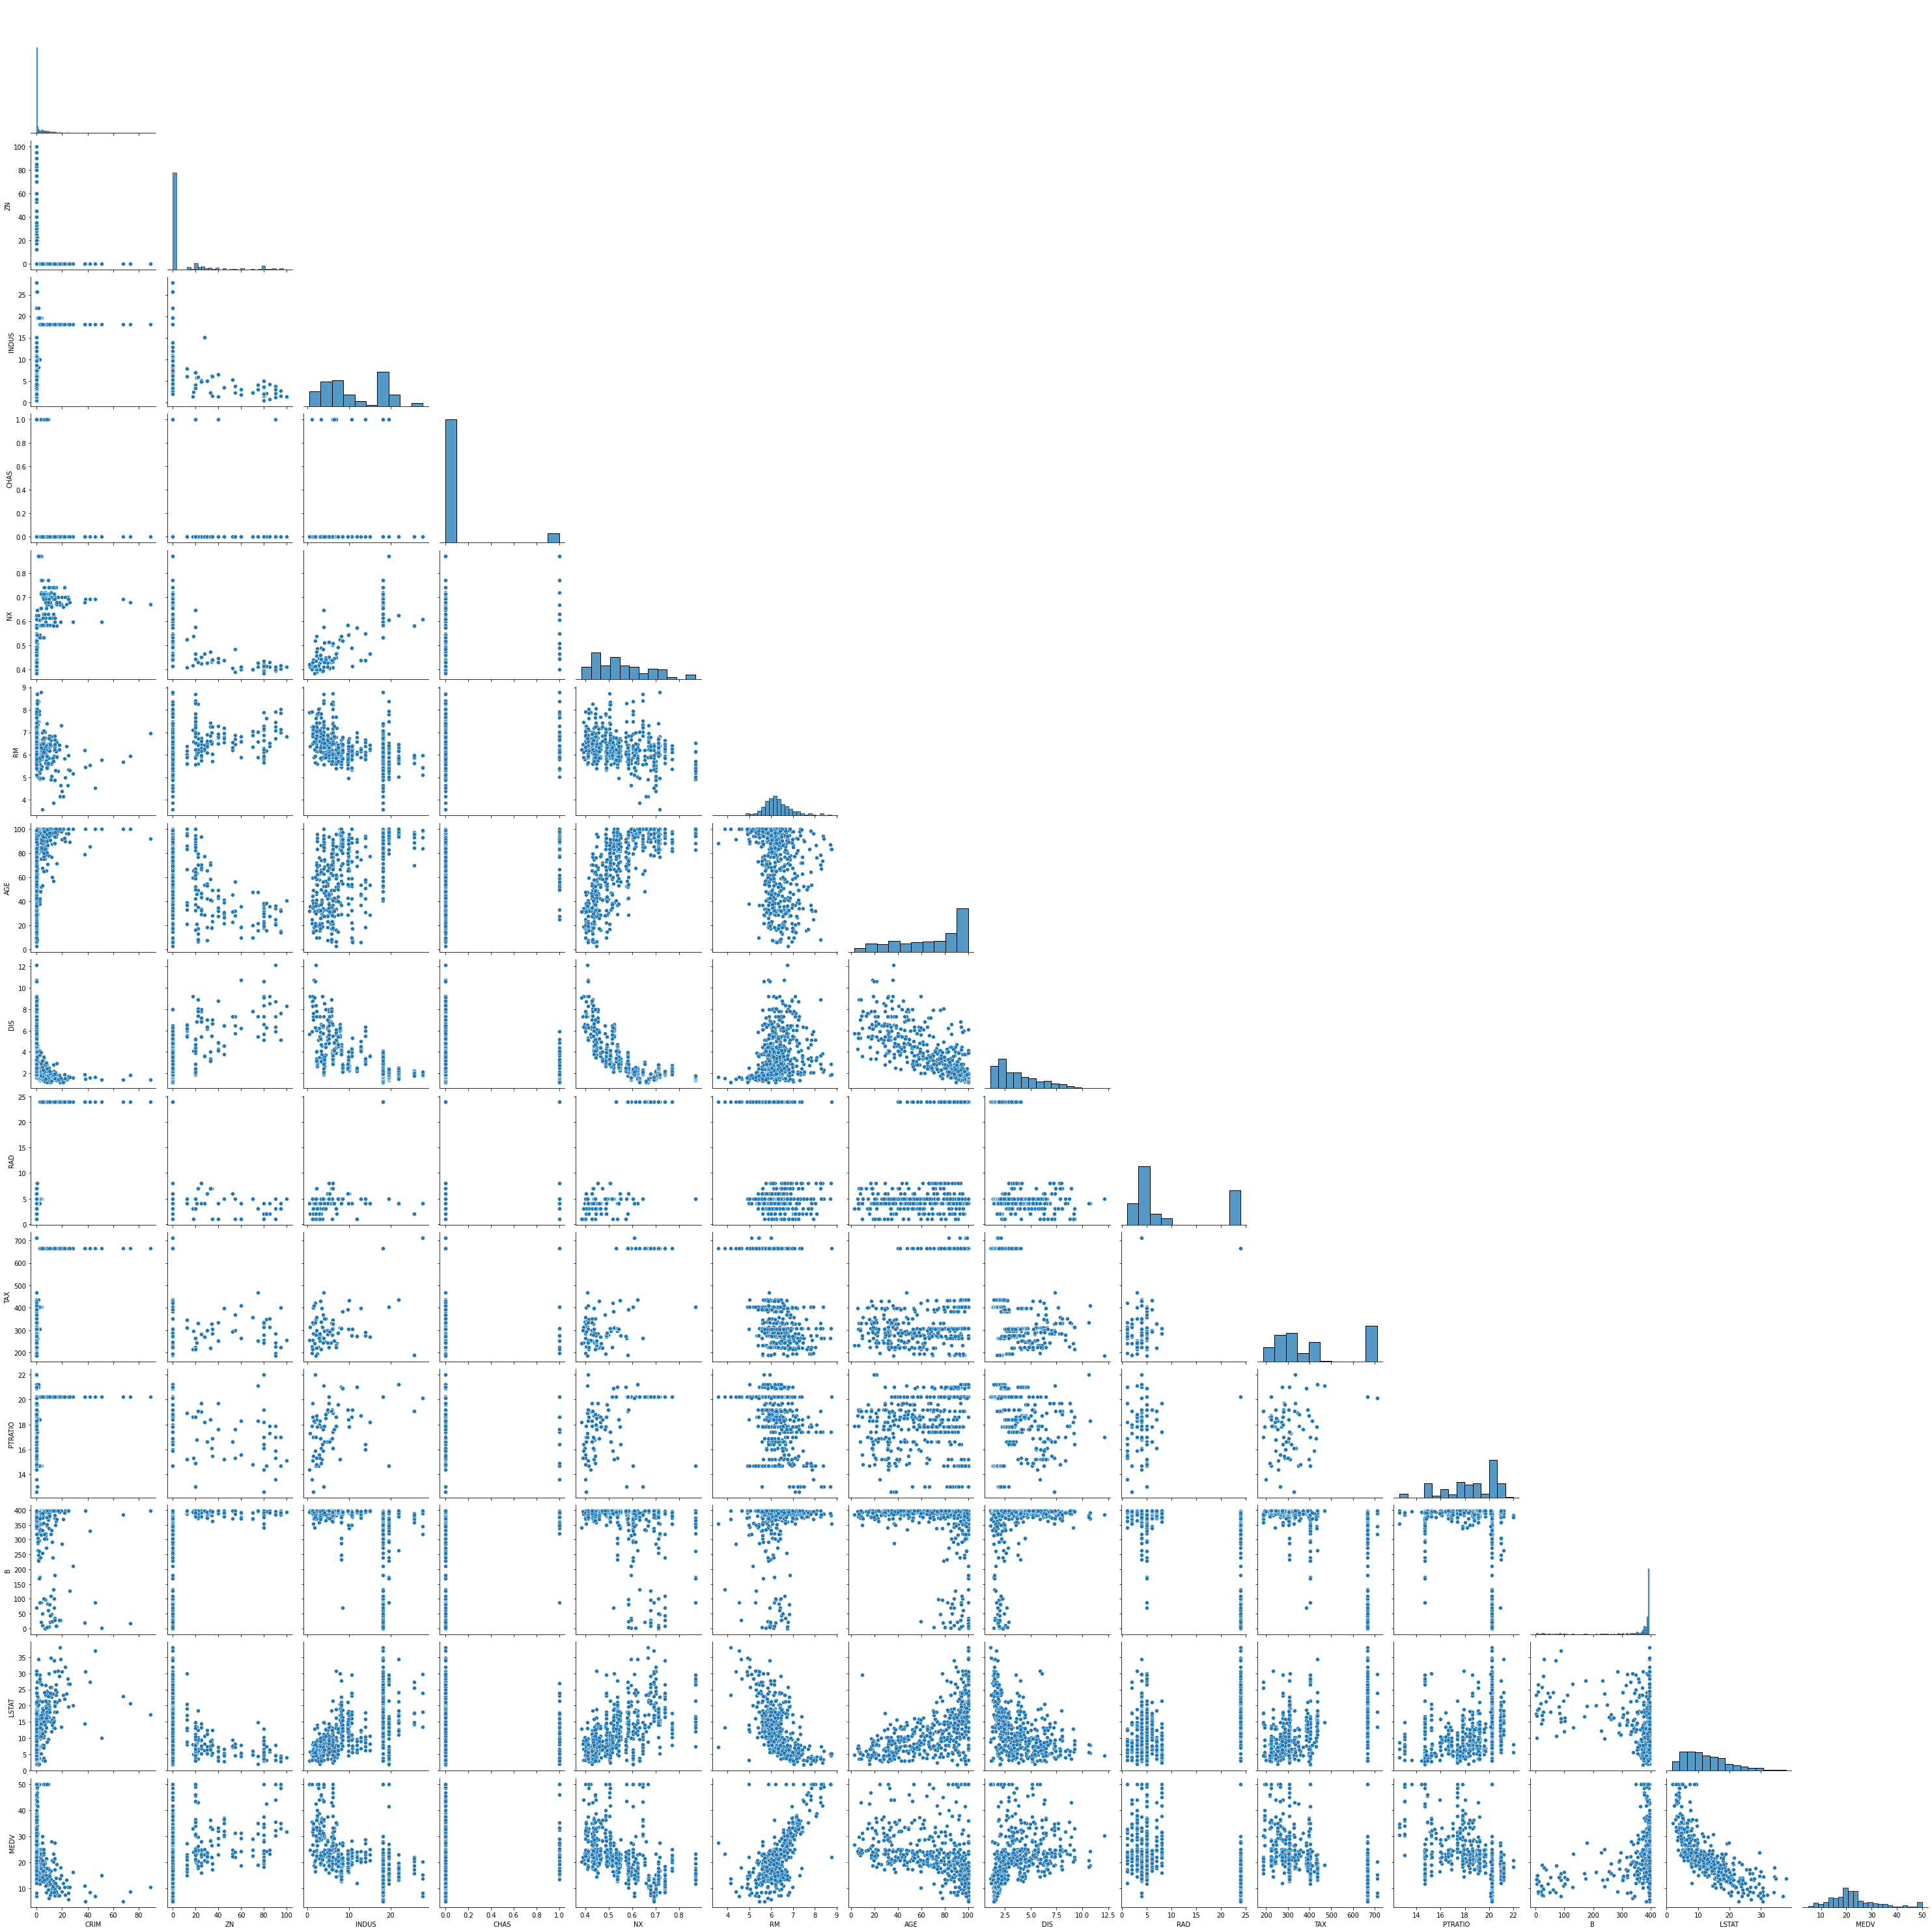

In [17]:
sns.pairplot(cdata , height=3, corner= True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


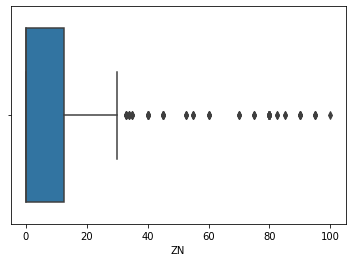

In [18]:
sns.boxplot(cdata['ZN'] , orient='v')

In [22]:
cdata[cdata.columns[:]].corr()['MEDV'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NX        -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

In [24]:
cdata.corr()['MEDV'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NX        -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

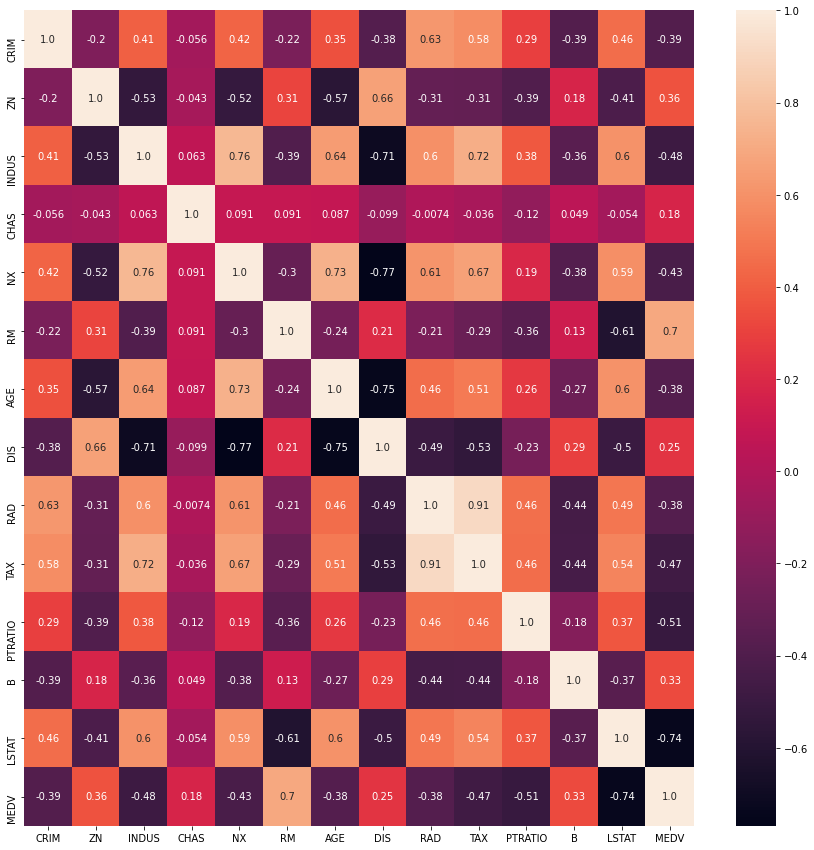

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(cdata.corr(), annot=True, fmt=".2")
plt.show()

In [35]:
lg_cdata = cdata.copy()
lg_cdata = pd.get_dummies(lg_cdata , columns = ['CHAS' , 'RAD'])
lg_cdata.head()

,CRIM,ZN,INDUS,NX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0,1,0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6,1,0,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7,1,0,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4,1,0,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2,1,0,0,0,1,0,0,0,0,0,0


### <a id = "link2">Split the dataset</a>
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [39]:
x = lg_cdata.drop('MEDV' , axis=1)
y = lg_cdata[['MEDV']]
print(x.head())
print(y.head())

      CRIM    ZN  INDUS     NX     RM  ...  RAD_5  RAD_6  RAD_7  RAD_8  RAD_24
0  0.00632  18.0   2.31  0.538  6.575  ...      0      0      0      0       0
1  0.02731   0.0   7.07  0.469  6.421  ...      0      0      0      0       0
2  0.02729   0.0   7.07  0.469  7.185  ...      0      0      0      0       0
3  0.03237   0.0   2.18  0.458  6.998  ...      0      0      0      0       0
4  0.06905   0.0   2.18  0.458  7.147  ...      0      0      0      0       0

[5 rows x 22 columns]
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [43]:
print(x.shape)
print(y.shape)


(506, 22)
(506, 1)


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 3)

### <a id = "link3">Using Linear Model from Scikit learn library</a>

**Fit the model to the training set**

In [45]:
linearRegression = LinearRegression()
linearRegression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Get the score on training set**

In [46]:
print(linearRegression.intercept_)
print(linearRegression.coef_)

[33.60477814]
[[-1.30436591e-01  5.34672896e-02 -5.82887963e-02 -1.09739118e+01
   3.53385630e+00  4.77927767e-03 -1.28237510e+00 -5.11328920e-03
  -8.74429428e-01  1.24680258e-02 -5.68165300e-01 -1.94046697e+00
   1.94046697e+00 -3.43649602e+00 -4.73666179e-01  1.42884465e+00
  -8.26902749e-01 -9.29441433e-01 -1.69706025e+00  1.38117290e+00
   6.23547709e-01  3.93000138e+00]]


**Write your own function for the r-squared score**

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pred = linearRegression.predict(x_test)


**Get the score on test set**

In [53]:
mean_absolute_error(y_test , pred)

3.3204413571624265

**Get the RMSE on test set**

In [54]:
mean_squared_error(y_test, pred)

21.963915421553054

In [61]:
r2_score(y_test, pred)

0.7207401672207892

In [79]:
output = x_test.copy()
output['Actual Values'] = y_test
output['Predicted Values'] = pred
output

,CRIM,ZN,INDUS,NX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,CHAS_0,CHAS_1,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24,Actual Values,Predicted Values
224,0.31533,0.0,6.20,0.504,8.266,78.3,2.8944,307.0,17.4,385.05,4.14,1,0,0,0,0,0,0,0,0,1,0,44.8,37.891611
137,0.35233,0.0,21.89,0.624,6.454,98.4,1.8498,437.0,21.2,394.08,14.59,1,0,0,0,0,1,0,0,0,0,0,17.1,19.424898
453,8.24809,0.0,18.10,0.713,7.393,99.3,2.4527,666.0,20.2,375.87,16.74,1,0,0,0,0,0,0,0,0,0,1,17.8,23.200479
303,0.10000,34.0,6.09,0.433,6.982,17.7,5.4917,329.0,16.1,390.43,4.86,1,0,0,0,0,0,0,0,1,0,0,33.1,33.805226
254,0.04819,80.0,3.64,0.392,6.108,32.0,9.2203,315.0,16.4,392.89,6.57,1,0,1,0,0,0,0,0,0,0,0,21.9,23.113204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.06047,0.0,2.46,0.488,6.153,68.8,3.2797,193.0,17.8,387.11,13.15,1,0,0,0,1,0,0,0,0,0,0,29.6,26.256851
128,0.32543,0.0,21.89,0.624,6.431,98.8,1.8125,437.0,21.2,396.90,15.39,1,0,0,0,0,1,0,0,0,0,0,18.0,18.977500
469,13.07510,0.0,18.10,0.580,5.713,56.7,2.8237,666.0,20.2,396.90,14.76,1,0,0,0,0,0,0,0,0,0,1,20.1,18.801323
123,0.15038,0.0,25.65,0.581,5.856,97.0,1.9444,188.0,19.1,370.31,25.41,1,0,0,1,0,0,0,0,0,0,0,17.3,14.481536


**Get model Coefficients**

**Automate the equation of the fit**

## <a id = "link4">Bonus: Using Statsmodels OLS</a>

**Make the linear model using OLS**

**Get the value of coefficient of determination**

**Get the Predictions on test set**

**Calculate MSE for training set**

**Get the RMSE on training set**

**Get the RMSE on test set**